In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
import pandas as pd
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize
x_train /= 255
x_test /= 255

11501568/11490434 [==============================] - 0s 0us/step


### **Multi layer perceptron implementation on black and white MNIST dataset and its performance testing on colored validation dataset**

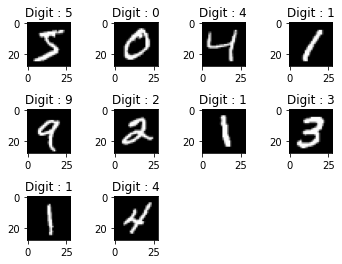

In [ ]:
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.imshow(x_train[i],cmap='binary_r')
  plt.title("Digit : {}".format(y_train[i]))
  plt.subplots_adjust(hspace=1)

In [ ]:
rgb_black = np.zeros((60000,28,28,3))
for i in range(60000):
  rgb_black[i] = np.stack((x_train[i],x_train[i],x_train[i]), axis=2)
x_train = rgb_black.reshape(60000, 28*28*3)

In [ ]:
num_classes = 10
epochs = 20
model = keras.Sequential(
    [
        layers.Dense(16, input_shape=(28 * 28 * 3,), activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,epochs=epochs,validation_split=0.2)
# Grayscale Training

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4395 - accuracy: 0.8691 - val_loss: 0.2552 - val_accuracy: 0.9276
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2421 - accuracy: 0.9287 - val_loss: 0.2108 - val_accuracy: 0.9389
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2085 - accuracy: 0.9395 - val_loss: 0.1933 - val_accuracy: 0.9430
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1867 - accuracy: 0.9442 - val_loss: 0.1879 - val_accuracy: 0.9461
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1729 - accuracy: 0.9485 - val_loss: 0.1858 - val_accuracy: 0.9471
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1611 - accuracy: 0.9513 - val_loss: 0.1893 - val_accuracy: 0.9463
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1541 - accuracy: 0.9542 - val_loss: 0.1854 - val_accuracy:

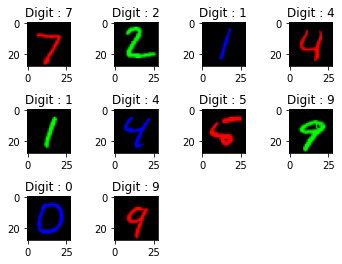

In [ ]:
del x_train
del y_train

shape = np.shape(x_test[1])
img_cnt = len(x_test)

rgb_0 = np.zeros((10000,28,28,3))
rgb_1 = np.zeros((10000,28,28,3))
rgb_2 = np.zeros((10000,28,28,3))


for i in range(img_cnt):
  rgb_0[i] = np.stack((x_test[i],np.zeros(shape),np.zeros(shape)), axis=2)
  rgb_1[i] = np.stack((np.zeros(shape),x_test[i],np.zeros(shape)), axis=2)
  rgb_2[i] = np.stack((np.zeros(shape),np.zeros(shape),x_test[i]), axis=2)
mnist_rgb = np.concatenate((rgb_0, rgb_1, rgb_2))

for i in range(10):
  plt.subplot(3,4,i+1)
  plt.imshow(mnist_rgb[(i+10000*i)%29999],cmap='binary_r')
  plt.title("Digit : {}".format(y_test[((i+10000*i)%29999)%10000]))
  plt.subplots_adjust(hspace=1)

mnist_rgb = mnist_rgb.reshape(30000, 28*28*3)

Test loss: 0.31829071044921875
Test accuracy:  % 94.05333399772644


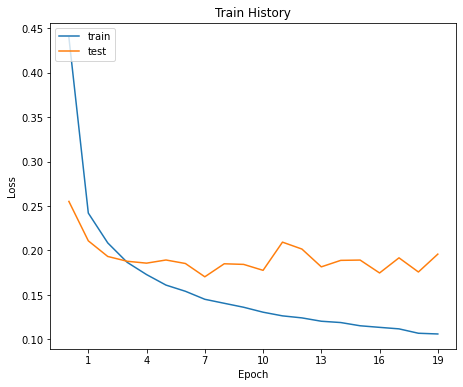

In [ ]:
def show_train_history(train_history):
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])
        
    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.xticks(range(1,21,3))
    plt.ylabel("Loss")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()
y_test = np.concatenate((y_test,y_test,y_test))
scores, acc = model.evaluate(mnist_rgb, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:  %', 100*acc)
show_train_history(history)
#Colored Test